# Learning Pandas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [132]:
pd.set_option("display.max_rows",10)

The two core objects in Pandas are : DataFrame and Series

## Introduction

### DataFrame

In [3]:
pd.DataFrame({'Yes': [50, 21], "No": [90,78]})

,Yes,No
0,50,90
1,21,78


In [4]:
pd.DataFrame({'Bob':['I LIKED IT HERE','Nice location','NDVI'],
              'Sue': ['Home','Homer','MSAVI']})

,Bob,Sue
0,I LIKED IT HERE,Home
1,Nice location,Homer
2,NDVI,MSAVI


- We are useing the pd.DataFrame() constructor to create DataFrame objects

- The syntax for declearing one is creating a dictionary whose keys are the column names (Bob, Sue) and the values are
in the list.

- The DataFrame just uses an ascending count from 0 for the row labels. Sometimes we want to assign these labels ourselves.

- The list of row labels used in a DataFrame is known as an index. We can assign values to it using an **index** parameter in the constructor.


In [5]:
pd.DataFrame({'Bob': [10,90,989], 
             'Sue': [99,88,77]}, index = ['Product A', 'Product B','Product C'])

,Bob,Sue
Product A,10,99
Product B,90,88
Product C,989,77


### Series

- Series is a sequence of data values. If a DataFrame is a table, Series is a list.

In [6]:
pd.Series([9,90,7.9,0.987])

0     9.000
1    90.000
2     7.900
3     0.987
dtype: float64

- A series is, in essence a single column of a DataFrame.

- We can assign row labels to the series the same way as before, using an **index** parameter. However, a Series object 
does not have a column name, it only has one overall **name**.

In [7]:
pd.Series([0.45, 0.55, 0.68, 0.76], index = ['NDVI_1','NDVI_2','NDVI_3','NDVI_4'], name = 'NDVI')

NDVI_1    0.45
NDVI_2    0.55
NDVI_3    0.68
NDVI_4    0.76
Name: NDVI, dtype: float64

- The Series object and DataFrame object are **glued** together. It is helpful to think of a DataFrame being a bunch of Series
objects "Glued" together.

### Reading Data Files

In [8]:
wine_reviews = pd.read_csv("Data/winemag-data-130k-v2.csv",index_col = 0)

In [9]:
wine_reviews.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [10]:
wine_reviews.shape

(129971, 13)

## Indexing, Selecting And Assigning

#### --- Native Accessors

Native Python objects provide a good way of indexing data, which Pandas carries over to start with.

In [11]:
reviews = wine_reviews

In [12]:
reviews.country

0            Italy
1         Portugal
            ...   
129969      France
129970      France
Name: country, Length: 129971, dtype: object

In [13]:
reviews['country']

0            Italy
1         Portugal
            ...   
129969      France
129970      France
Name: country, Length: 129971, dtype: object

In [14]:
reviews['country'][0]

'Italy'

#### --- Indexing in Pandas

Pandas has its own accessor operators, the **loc** and **iloc**. They are the ones we want to use for more advanced operatinons.


##### Index-based selection

Pandas indexing works on one of two paradigms. The first is **index-based selection**: selecting data based on its numerical position
    in the data. **iloc** follows this paradigm.

In [15]:
reviews.iloc[0]

country                                                    Italy
description    Aromas include tropical fruit, broom, brimston...
                                     ...                        
variety                                              White Blend
winery                                                   Nicosia
Name: 0, Length: 13, dtype: object

In [16]:
reviews.iloc[0:9, 0:3]

,country,description,designation
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos
...,...,...,...
7,France,This dry and restrained wine offers spice in p...,NaN
8,Germany,Savory dried thyme notes accent sunnier flavor...,Shine


###### -- reviews.iloc[rows, columns]

Both **loc** and **iloc** are row-first, column-second, which is the opposite of native Python which is column-first and row-second.

This means that it's marginally easier to retrieve rows , and marginally harder to retrieve columns.

To get a column  with **iloc** we can do this: 

In [17]:
reviews.iloc[:,0:9]

,country,description,designation,points,price,province,region_1,region_2,taster_name
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss
...,...,...,...,...,...,...,...,...,...
129969,France,"A dry style of Pinot Gris, this is crisp with ...",NaN,90,32.0,Alsace,Alsace,NaN,Roger Voss
129970,France,"Big, rich and off-dry, this is powered by inte...",Lieu-dit Harth Cuvée Caroline,90,21.0,Alsace,Alsace,NaN,Roger Voss


The : operator on its own means select "everything". When combined with other selectors, it can be used to indicate 
    a range of values. For example, to select the **country** column from just the first, second, and third row, we would use:

In [18]:
reviews.iloc[:3, 0]

0       Italy
1    Portugal
2          US
Name: country, dtype: object

Or to select the second and third entries

In [19]:
reviews.iloc[1:3, 0]

1    Portugal
2          US
Name: country, dtype: object

It's also possible to pass a list:

In [20]:
reviews.iloc[[0,1,2], :]

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm


Finally, its worth noting that numbers can be used in selection.

This will start counting forwards from the end of the values.

For example, here are the last 5 elements of the dataset:

In [21]:
reviews.iloc[-5:]

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.0,Mosel,NaN,NaN,Anna Lee C. Iijima,NaN,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef)
129967,US,Citation is given as much as a decade of bottl...,NaN,90,75.0,Oregon,Oregon,Oregon Other,Paul Gregutt,@paulgwine,Citation 2004 Pinot Noir (Oregon),Pinot Noir,Citation
129968,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser
129969,France,"A dry style of Pinot Gris, this is crisp with ...",NaN,90,32.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss
129970,France,"Big, rich and off-dry, this is powered by inte...",Lieu-dit Harth Cuvée Caroline,90,21.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Schoffit 2012 Lieu-dit Harth Cuvée Car...,Gewürztraminer,Domaine Schoffit


#### Label based selection

The second paradigm for attribute selection is the one followed by the **loc** operator. 
In this paradigm, it's the data index value, not its position, which matters.

For example to get the first entry in reviews, we would: 

In [22]:
reviews.loc[0,'country']

'Italy'

In [23]:
reviews.loc[:,['country', 'description','points','taster_twitter_handle']]

,country,description,points,taster_twitter_handle
0,Italy,"Aromas include tropical fruit, broom, brimston...",87,@kerinokeefe
1,Portugal,"This is ripe and fruity, a wine that is smooth...",87,@vossroger
...,...,...,...,...
129969,France,"A dry style of Pinot Gris, this is crisp with ...",90,@vossroger
129970,France,"Big, rich and off-dry, this is powered by inte...",90,@vossroger


- When choosing between **loc** and **iloc**, there is one **gotcha** to keep in mind, which is that the two methods use
slightly different indexing schemes.

- **iloc** uses the standard stdlib scheme, where the first element of the range is included and last one excluded. So 0:10 will select entries 0,1,2,3,4,5,6,7,8,9.
    
- **loc**, meanwhile, indexes exclusively. So 0:10 will select entries 0,......,10

    
This is particularly confusing when the DataFrame index is a simple numerical list e.g 0.....,1000. In this case **df.iloc[0:1000]** will return 1000 entries.
While **df.loc[0:1000]** will return 1001 entries! So to get 1000 entries using loc, you will need to go one step lower and ask for **df.loc[0:999]**

Otherwise the semantics of using **loc** and **iloc** are the same.

### Manipulating the Index

Label-based selection (using loc) derives its power from the labels in the index. Critically, the index we use is not **immutable**. We can manipulate
the index in a way we see fit.

The set_index() method is used to set indies for the reviews dataframe for example:

In [24]:
df = reviews.set_index("title")

### Conditional selection

To do interesting things with the data, we need to ask questions based on conditions.

For example, supposed we are interested specifically in better than average wines produces in Italy.

We start by checking if each wine is Italian or not: 

In [25]:
reviews.country == "Italy"

0          True
1         False
          ...  
129969    False
129970    False
Name: country, Length: 129971, dtype: bool

This operation above, produced a Series of **True / False** booleans based on the country of each record. This result can then be
used inside of **loc** to select the relevant data:

In [26]:
reviews.loc[reviews.country == "Italy"]

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
6,Italy,"Here's a bright, informal red that opens with ...",Belsito,87,16.0,Sicily & Sardinia,Vittoria,NaN,Kerin O’Keefe,@kerinokeefe,Terre di Giurfo 2013 Belsito Frappato (Vittoria),Frappato,Terre di Giurfo
...,...,...,...,...,...,...,...,...,...,...,...,...,...
129961,Italy,"Intense aromas of wild cherry, baking spice, t...",NaN,90,30.0,Sicily & Sardinia,Sicilia,NaN,Kerin O’Keefe,@kerinokeefe,COS 2013 Frappato (Sicilia),Frappato,COS
129962,Italy,"Blackberry, cassis, grilled herb and toasted a...",Sàgana Tenuta San Giacomo,90,40.0,Sicily & Sardinia,Sicilia,NaN,Kerin O’Keefe,@kerinokeefe,Cusumano 2012 Sàgana Tenuta San Giacomo Nero d...,Nero d'Avola,Cusumano


The dataframe has ~ 20,000 rows, and the original had ~130000 rows. That means about 15% of wines originate from Italy.

We also wanted to know which ones are better than average. Wines are reviewed on a 80-to-100 point scale, so this could mean
wines that accrued at least 90 points.

We can use the (&) operato to bring the two questions together

In [27]:
reviews.loc[(reviews.country == "Italy") & (reviews.points >=90)]

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
120,Italy,"Slightly backward, particularly given the vint...",Bricco Rocche Prapó,92,70.0,Piedmont,Barolo,NaN,NaN,NaN,Ceretto 2003 Bricco Rocche Prapó (Barolo),Nebbiolo,Ceretto
130,Italy,"At the first it was quite muted and subdued, b...",Bricco Rocche Brunate,91,70.0,Piedmont,Barolo,NaN,NaN,NaN,Ceretto 2003 Bricco Rocche Brunate (Barolo),Nebbiolo,Ceretto
...,...,...,...,...,...,...,...,...,...,...,...,...,...
129961,Italy,"Intense aromas of wild cherry, baking spice, t...",NaN,90,30.0,Sicily & Sardinia,Sicilia,NaN,Kerin O’Keefe,@kerinokeefe,COS 2013 Frappato (Sicilia),Frappato,COS
129962,Italy,"Blackberry, cassis, grilled herb and toasted a...",Sàgana Tenuta San Giacomo,90,40.0,Sicily & Sardinia,Sicilia,NaN,Kerin O’Keefe,@kerinokeefe,Cusumano 2012 Sàgana Tenuta San Giacomo Nero d...,Nero d'Avola,Cusumano


Suppose we'll buy any wine that's made in Italy or which is rated above average. For that we use a pipe (|): 

    

In [28]:
reviews.loc[(reviews.country == "Italy") | (reviews.points >= 90)]

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
6,Italy,"Here's a bright, informal red that opens with ...",Belsito,87,16.0,Sicily & Sardinia,Vittoria,NaN,Kerin O’Keefe,@kerinokeefe,Terre di Giurfo 2013 Belsito Frappato (Vittoria),Frappato,Terre di Giurfo
...,...,...,...,...,...,...,...,...,...,...,...,...,...
129969,France,"A dry style of Pinot Gris, this is crisp with ...",NaN,90,32.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss
129970,France,"Big, rich and off-dry, this is powered by inte...",Lieu-dit Harth Cuvée Caroline,90,21.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Schoffit 2012 Lieu-dit Harth Cuvée Car...,Gewürztraminer,Domaine Schoffit


Pandas does come with a few built-in selectors. The first one is **isin**.

**isin** lets you select data whose value "is in " a list of values. For example we can use it to select only wines
from Italy and France.

In [29]:
reviews.loc[reviews.country.isin(['Italy','France'])]

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
6,Italy,"Here's a bright, informal red that opens with ...",Belsito,87,16.0,Sicily & Sardinia,Vittoria,NaN,Kerin O’Keefe,@kerinokeefe,Terre di Giurfo 2013 Belsito Frappato (Vittoria),Frappato,Terre di Giurfo
...,...,...,...,...,...,...,...,...,...,...,...,...,...
129969,France,"A dry style of Pinot Gris, this is crisp with ...",NaN,90,32.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss
129970,France,"Big, rich and off-dry, this is powered by inte...",Lieu-dit Harth Cuvée Caroline,90,21.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Schoffit 2012 Lieu-dit Harth Cuvée Car...,Gewürztraminer,Domaine Schoffit


The other method isnull() and its counterpart notnull() let you select values that are empty or not empty (NaN)

In [30]:
reviews.loc[reviews.price.notnull()]

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
...,...,...,...,...,...,...,...,...,...,...,...,...,...
129969,France,"A dry style of Pinot Gris, this is crisp with ...",NaN,90,32.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss
129970,France,"Big, rich and off-dry, this is powered by inte...",Lieu-dit Harth Cuvée Caroline,90,21.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Schoffit 2012 Lieu-dit Harth Cuvée Car...,Gewürztraminer,Domaine Schoffit


### Assigning Data

You can easily assign values to a column or columns in a DataFrame.

In [31]:
df['critic'] ="Everyone"
df['critic']

title
Nicosia 2013 Vulkà Bianco  (Etna)                                              Everyone
Quinta dos Avidagos 2011 Avidagos Red (Douro)                                  Everyone
                                                                                 ...   
Domaine Marcel Deiss 2012 Pinot Gris (Alsace)                                  Everyone
Domaine Schoffit 2012 Lieu-dit Harth Cuvée Caroline Gewurztraminer (Alsace)    Everyone
Name: critic, Length: 129971, dtype: object

In [32]:
df['index_backwards'] = range(len(reviews), 0, -1)
df['index_backwards']

title
Nicosia 2013 Vulkà Bianco  (Etna)                                              129971
Quinta dos Avidagos 2011 Avidagos Red (Douro)                                  129970
                                                                                ...  
Domaine Marcel Deiss 2012 Pinot Gris (Alsace)                                       2
Domaine Schoffit 2012 Lieu-dit Harth Cuvée Caroline Gewurztraminer (Alsace)         1
Name: index_backwards, Length: 129971, dtype: int64

In [33]:
df.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,variety,winery,critic,index_backwards
title,,,,,,,,,,,,,,
Nicosia 2013 Vulkà Bianco (Etna),Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,White Blend,Nicosia,Everyone,129971
Quinta dos Avidagos 2011 Avidagos Red (Douro),Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Portuguese Red,Quinta dos Avidagos,Everyone,129970
Rainstorm 2013 Pinot Gris (Willamette Valley),US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Pinot Gris,Rainstorm,Everyone,129969
St. Julian 2013 Reserve Late Harvest Riesling (Lake Michigan Shore),US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,Riesling,St. Julian,Everyone,129968
Sweet Cheeks 2012 Vintner's Reserve Wild Child Block Pinot Noir (Willamette Valley),US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Pinot Noir,Sweet Cheeks,Everyone,129967


In [34]:
df.iloc[0]

country                                                        Italy
description        Aromas include tropical fruit, broom, brimston...
                                         ...                        
critic                                                      Everyone
index_backwards                                               129971
Name: Nicosia 2013 Vulkà Bianco  (Etna), Length: 14, dtype: object

In [35]:
df.description.iloc[0:9]

title
Nicosia 2013 Vulkà Bianco  (Etna)                      Aromas include tropical fruit, broom, brimston...
Quinta dos Avidagos 2011 Avidagos Red (Douro)          This is ripe and fruity, a wine that is smooth...
                                                                             ...                        
Trimbach 2012 Gewurztraminer (Alsace)                  This dry and restrained wine offers spice in p...
Heinz Eifel 2013 Shine Gewürztraminer (Rheinhessen)    Savory dried thyme notes accent sunnier flavor...
Name: description, Length: 9, dtype: object

In [36]:
df[['country','variety']].iloc[0:100]

,country,variety
title,,
Nicosia 2013 Vulkà Bianco (Etna),Italy,White Blend
Quinta dos Avidagos 2011 Avidagos Red (Douro),Portugal,Portuguese Red
...,...,...
Serpaia di Endrizzi 2010 Dono Riserva (Morellino di Scansano),Italy,Sangiovese
Soquel Vineyards 2013 Intreccio Library Selection Red (Napa Valley),US,Bordeaux-style Red Blend


In [37]:
df_oceania = reviews.loc[(reviews.points >= 95) & (reviews.country == "Australia") | (reviews.country == "New Zealand")]
df_oceania

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
174,New Zealand,The Stoneleigh style traditionally favors ripe...,NaN,88,19.0,Marlborough,NaN,NaN,Joe Czerwinski,@JoeCz,Stoneleigh 2008 Sauvignon Blanc (Marlborough),Sauvignon Blanc,Stoneleigh
311,New Zealand,"This wine is light in color, but still packs a...",NaN,87,18.0,Hawke's Bay,NaN,NaN,Joe Czerwinski,@JoeCz,Otto's Constant Dream 2008 Syrah (Hawke's Bay),Syrah,Otto's Constant Dream
...,...,...,...,...,...,...,...,...,...,...,...,...,...
129956,New Zealand,"The blend is 44% Merlot, 33% Cabernet Sauvigno...",Gimblett Gravels Merlot-Cabernet Sauvignon-Malbec,90,19.0,Hawke's Bay,NaN,NaN,Joe Czerwinski,@JoeCz,Esk Valley 2011 Gimblett Gravels Merlot-Cabern...,Bordeaux-style Red Blend,Esk Valley
129958,New Zealand,This blend of Cabernet Sauvignon-Merlot and Ca...,Irongate,90,35.0,Hawke's Bay,NaN,NaN,Joe Czerwinski,@JoeCz,Babich 2010 Irongate Red (Hawke's Bay),Bordeaux-style Red Blend,Babich


In [38]:
oceania_wines = reviews.loc[(reviews.country.isin(['Australia','New Zealand'])) & (reviews.points >= 95)]
oceania_wines.country.unique()

array(['Australia', 'New Zealand'], dtype=object)

### Summary functions and Maps

In [39]:
reviews.points.describe()

count    129971.000000
mean         88.447138
             ...      
75%          91.000000
max         100.000000
Name: points, Length: 8, dtype: float64

In [40]:
reviews.describe(include="all")

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
count,129908,129971,92506,129971.0,120975.0,129908,108724,50511,103727,98758,129971,129970,129971
unique,43,119955,37979,NaN,NaN,425,1229,17,19,15,118840,707,16757
...,...,...,...,...,...,...,...,...,...,...,...,...,...
75%,NaN,NaN,NaN,91.0,42.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,100.0,3300.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
reviews.points.mean()

88.44713820775404

In [42]:
reviews.price.mean()

35.363389129985535

In [43]:
reviews.loc[reviews.country == "Italy"].price.mean()

39.663769658271256

In [44]:
countries = reviews.country.unique()
means = []
for i in countries:
    country_mean = reviews.loc[reviews.country == i].price.mean()
    means.append(country_mean)
    
dict_df = dict(zip(countries, means))
dict_ = {}
for key, value in dict_df.items():
    dict_.update({key: value})
print(dict_)

{'Italy': 39.663769658271256, 'Portugal': 26.21825641025641, 'US': 36.5734635584631, 'Spain': 28.215274608245853, 'France': 41.139120162016205, 'Germany': 42.25754716981132, 'Argentina': 24.510117145899894, 'Chile': 20.786458333333332, 'Australia': 35.43766346992153, 'Austria': 30.76277241872097, 'South Africa': 24.668986852281517, 'New Zealand': 26.93178519593614, 'Israel': 31.768916155419223, 'Hungary': 40.648275862068964, 'Greece': 22.364425162689805, 'Romania': 15.241666666666667, 'Mexico': 26.785714285714285, 'Canada': 35.71259842519685, nan: nan, 'Turkey': 24.633333333333333, 'Czech Republic': 24.25, 'Slovenia': 24.8125, 'Luxembourg': 23.333333333333332, 'Croatia': 25.450704225352112, 'Georgia': 19.321428571428573, 'Uruguay': 26.40366972477064, 'England': 51.68115942028985, 'Lebanon': 30.685714285714287, 'Serbia': 24.5, 'Brazil': 23.76595744680851, 'Moldova': 16.74576271186441, 'Morocco': 19.5, 'Peru': 18.0625, 'India': 13.333333333333334, 'Bulgaria': 14.645390070921986, 'Cyprus'

<Axes: ylabel='Country'>

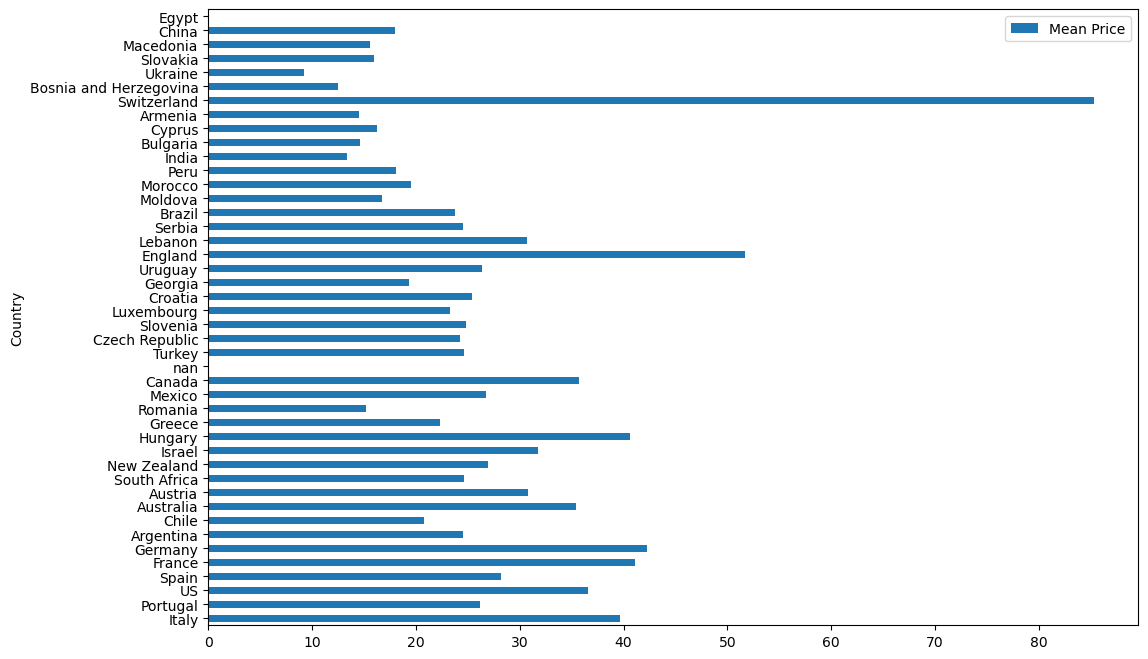

In [45]:
mean_prices = pd.DataFrame({'Country': dict_.keys(), 'Mean Price': dict_.values()})
mean_prices.plot(kind="barh",x = "Country", y="Mean Price", figsize= (12,8))

To see a list of unique values and how frequentlt occur in a DataFrame we use the value_counts() method:

In [46]:
reviews.country.value_counts()

country
US        54504
France    22093
          ...  
China         1
Egypt         1
Name: count, Length: 43, dtype: int64

#### Map functions

In Data Science, there is usually a need to transform the data from the format that it is in currently into some values

Maps handle this kind of tasks. And there are two kinds of maps that we can utilize: 
    
Using the **map()** function - The map function is commonly used on a Series alongside the lambda expression

Using the **apply()** function which works itteratively on each row in a DataFrame.

In [47]:
review_points_mean = reviews.points.mean()
reviews.points.map(lambda x: x - review_points_mean)

0        -1.447138
1        -1.447138
            ...   
129969    1.552862
129970    1.552862
Name: points, Length: 129971, dtype: float64

In [48]:
review_points_mean = reviews.points.mean()
reviews.points.map(lambda x: x - review_points_mean)

0        -1.447138
1        -1.447138
            ...   
129969    1.552862
129970    1.552862
Name: points, Length: 129971, dtype: float64

In [49]:
meanPrice = reviews.price.mean()
reviews["deviation_from_mean"] = reviews.price.map(lambda p: p - meanPrice)

**map()** should expect a single value from the Series and return a transformed version of that value. **map()** returns a new
Series where all the values have been transformed by the lambda expression.

**apply()** is the method to use when we want to transform a whole DataFrame by calling a custom method on each row.

In [50]:
def remean_points(row):
    row.points = row.points - review_points_mean
    return row

#reviews.apply(remean_points, axis = "columns")

##### Which wine is the best bargain i.e The wine with the highest points to price ratio

In [51]:
bargain_idx = (reviews.points / reviews.price)


In [52]:
reviews.loc[bargain_idx.idxmin(), "title"]

'Château les Ormes Sorbet 2013  Médoc'

In [53]:
bargain_idx = (reviews.points / reviews.price).idxmax()
bargain_wine = reviews.loc[bargain_idx,"title"]

In [54]:
reviews.loc[bargain_idx,"title"]

'Bandit NV Merlot (California)'

##### Create a series called descriptor which counts how many times the words tropical and fruity appear in the description column

In [55]:
number_tropical = reviews.description.map(lambda desc: "tropical" in desc).sum()
number_fruity = reviews.description.map(lambda desc: "fruity" in desc).sum()
descriptors = pd.Series([number_tropical, number_fruity], index = ["tropical","fruity"])
descriptors

tropical    3607
fruity      9090
dtype: int64

In [56]:
reviews["star_ratings"] = np.NaN

In [57]:
def rate_dataset(row):
    if row.country == "Canada":
        return 3
    elif row.points >= 95:
        return 3
    elif row.points >= 85:
        return 2
    else:
        return 1

## compute first and assign later, we don't want to do both in this function, this function should just be for returning a value

In [58]:
star_ratings = reviews.apply(rate_dataset, axis = "columns")
reviews['star_ratings'] = star_ratings ### now assign to a new column which is part of the dataframe

### Grouping and Sorting

- Maps have allowed us to transform the data in a DataFrame or Series one value at a time for an entire column.

- Often, we want to group the dataset and do something specific to the group resulting from it.

- We can achieve this using the **groupby()** operation

One function we have used a lot so far is the value_counts() which we can replicate by:

In [59]:
reviews.groupby("points").points.count()

points
80     397
81     692
      ... 
99      33
100     19
Name: points, Length: 21, dtype: int64

In [60]:
## Get the cheapest wine in each point value category

In [61]:
reviews.groupby("points").price.min()

points
80      5.0
81      5.0
       ... 
99     44.0
100    80.0
Name: price, Length: 21, dtype: float64

We can think of each group generated as being a slice of out DataFrame containing only data that match.

This DataFrame is accessible to us directly using the **apply()** method and we can manipulate the data in any way we see fit.

For example, we can select the name of the first wine reviewed from each winery in the dataset:



In [62]:
reviews.groupby("winery").apply(lambda df: df.title.iloc[0])

winery
1+1=3                          1+1=3 NV Rosé Sparkling (Cava)
10 Knots                 10 Knots 2010 Viognier (Paso Robles)
                                  ...                        
àMaurice    àMaurice 2013 Fred Estate Syrah (Walla Walla V...
Štoka                         Štoka 2009 Izbrani Teran (Kras)
Length: 16757, dtype: object

##### We can also group the data by more than one column:

In [63]:
##We can pick out the best wine by country and provice:

In [64]:
reviews.groupby(["country","province"]).count()

description  designation  points  price  region_1  \
country   province                                                              
Argentina Mendoza Province         3264         2500    3264   3226      3211   
          Other                     536          402     536    530       536   
...                                 ...          ...     ...    ...       ...   
Uruguay   San Jose                    3            3       3      3         0   
          Uruguay                    24           23      24     24         0   

                            region_2  taster_name  taster_twitter_handle  \
country   province                                                         
Argentina Mendoza Province         0         3261                   3261   
          Other                    0          536                    536   
...                              ...          ...                    ...   
Uruguay   San Jose                 0            3                      3   
          Uruguay                  0           24                     24   

                            title  variety  winery  deviation_from_mean  \
country   province                                                        
Argentina Mendoza Province   3264     3264    3264                 3226   
          Other               536      536     536                  530   
...                           ...      ...     ...                  ...   
Uruguay   San Jose              3        3       3                    3   
          Uruguay              24       24      24                   24   

                            star_ratings  
country   province                        
Argentina Mendoza Province          3264  
          Other                      536  
...                                  ...  
Uruguay   San Jose                     3  
          Uruguay                     24  

[425 rows x 13 columns]

In [65]:
reviews.groupby(["country","province"]).apply(
    lambda df: df.loc[df.points.idxmax()]
)

country  \
country   province                      
Argentina Mendoza Province  Argentina   
          Other             Argentina   
...                               ...   
Uruguay   San Jose            Uruguay   
          Uruguay             Uruguay   

                                                                  description  \
country   province                                                              
Argentina Mendoza Province  If the color doesn't tell the full story, the ...   
          Other             Take note, this could be the best wine Colomé ...   
...                                                                       ...   
Uruguay   San Jose          Baked, sweet, heavy aromas turn earthy with ti...   
          Uruguay           Cherry and berry aromas are ripe, healthy and ...   

                                          designation  points  price  \
country   province                                                     
Argentina Mendoza Province           Nicasia Vineyard      97  120.0   
          Other                               Reserva      95   90.0   
...                                               ...     ...    ...   
Uruguay   San Jose           El Preciado Gran Reserva      87   50.0   
          Uruguay           Blend 002 Limited Edition      91   22.0   

                                    province region_1 region_2  \
country   province                                               
Argentina Mendoza Province  Mendoza Province  Mendoza      NaN   
          Other                        Other    Salta      NaN   
...                                      ...      ...      ...   
Uruguay   San Jose                  San Jose      NaN      NaN   
          Uruguay                    Uruguay      NaN      NaN   

                                  taster_name taster_twitter_handle  \
country   province                                                    
Argentina Mendoza Province  Michael Schachner           @wineschach   
          Other             Michael Schachner           @wineschach   
...                                       ...                   ...   
Uruguay   San Jose          Michael Schachner           @wineschach   
          Uruguay           Michael Schachner           @wineschach   

                                                                        title  \
country   province                                                              
Argentina Mendoza Province  Bodega Catena Zapata 2006 Nicasia Vineyard Mal...   
          Other                            Colomé 2010 Reserva Malbec (Salta)   
...                                                                       ...   
Uruguay   San Jose          Castillo Viejo 2005 El Preciado Gran Reserva R...   
          Uruguay           Narbona NV Blend 002 Limited Edition Tannat-Ca...   

                                          variety                winery  \
country   province                                                        
Argentina Mendoza Province                 Malbec  Bodega Catena Zapata   
          Other                            Malbec                Colomé   
...                                           ...                   ...   
Uruguay   San Jose                      Red Blend        Castillo Viejo   
          Uruguay           Tannat-Cabernet Franc               Narbona   

                            deviation_from_mean  star_ratings  
country   province                                             
Argentina Mendoza Province            84.636611             3  
          Other                       54.636611             3  
...                                         ...           ...  
Uruguay   San Jose                    14.636611             2  
          Uruguay                    -13.363389             2  

[425 rows x 15 columns]

Another groupby method worth mentioning id the **agg()**, which lets you run a bunch
of different functions on your DataFrame simultaneously.

For example we can generate simple statistical summary of the dataset:

In [66]:
reviews.groupby(["country"]).price.agg([len, "min", "max"])

,len,min,max
country,,,
Argentina,3800,4.0,230.0
Armenia,2,14.0,15.0
...,...,...,...
Ukraine,14,6.0,13.0
Uruguay,109,10.0,130.0


#### Multi-indexes

A multi-index is different from the regular index in that it has multiple levels.

Depending on how the **groupby()** is used, it can result into a multi-index.

In [67]:
countries_reviewed = reviews.groupby(["country","province"]).description.agg([len])
countries_reviewed

len
country   province              
Argentina Mendoza Province  3264
          Other              536
...                          ...
Uruguay   San Jose             3
          Uruguay             24

[425 rows x 1 columns]

In [68]:
mi = countries_reviewed.index
type(mi)

pandas.core.indexes.multi.MultiIndex

In [69]:
countries_reviewed.reset_index()

,country,province,len
0,Argentina,Mendoza Province,3264
1,Argentina,Other,536
...,...,...,...
423,Uruguay,San Jose,3
424,Uruguay,Uruguay,24


#### Sorting

By taking a look at the **countries_reviewed**, we can see that the grouping returns data in index order, not in value order.

The ordering results of a groupby depend on the values in the index, not in the data

To the data in the order we want, we can use the **sort_values()** method:

In [70]:
countries_rev = countries_reviewed.reset_index()
countries_rev.sort_values(by='len')

### The default is an ascending sorting order

,country,province,len
179,Greece,Muscat of Kefallonian,1
192,Greece,Sterea Ellada,1
...,...,...,...
415,US,Washington,8639
392,US,California,36247


In [71]:
countries_rev.sort_values(by="len", ascending = False)

,country,province,len
392,US,California,36247
415,US,Washington,8639
...,...,...,...
63,Chile,Coelemu,1
149,Greece,Beotia,1


- We can also sort the index values by using the **sort_index()** method

In [72]:
countries_rev.sort_index()

,country,province,len
0,Argentina,Mendoza Province,3264
1,Argentina,Other,536
...,...,...,...
423,Uruguay,San Jose,3
424,Uruguay,Uruguay,24


We can also sort by more than one column at a time:

In [73]:
countries_rev.sort_values(by=['country','len'], ascending=True)

,country,province,len
1,Argentina,Other,536
0,Argentina,Mendoza Province,3264
...,...,...,...
424,Uruguay,Uruguay,24
419,Uruguay,Canelones,43


In [74]:
reviews.columns

Index(['country', 'description', 'designation', 'points', 'price', 'province',
       'region_1', 'region_2', 'taster_name', 'taster_twitter_handle', 'title',
       'variety', 'winery', 'deviation_from_mean', 'star_ratings'],
      dtype='object')

#### Questions >>>>>

##### Who are the most common wine reviewers in the dataset, and how many reviews does each person have ?

In [75]:
reviews.groupby("taster_twitter_handle").taster_twitter_handle.count()

taster_twitter_handle
@AnneInVino        3685
@JoeCz             5147
                   ... 
@winewchristina       6
@worldwineguys     1005
Name: taster_twitter_handle, Length: 15, dtype: int64

##### What is the best wine I can buy for a given amount of money ?

In [76]:
reviews.groupby("price").points.max().sort_index(ascending=True)

price
4.0       86
5.0       87
          ..
2500.0    96
3300.0    88
Name: points, Length: 390, dtype: int64

##### What is the minimum and maximum prices for each variety of wine ?

In [77]:
reviews.groupby("variety").price.agg(["min","max"])

,min,max
variety,,
Abouriou,15.0,75.0
Agiorgitiko,10.0,66.0
...,...,...
Çalkarası,19.0,19.0
Žilavka,15.0,15.0


##### What are the most expensive wine varieties ?

In [78]:
reviews.groupby("variety").price.agg(["min","max"]).sort_values(by = ["min","max"], ascending = False)

,min,max
variety,,
Ramisco,495.0,495.0
Terrantez,236.0,236.0
...,...,...
Vital,NaN,NaN
Zelen,NaN,NaN


##### Create a series whose index is reviewers and whose values is the average review score given out

In [79]:
reviews.groupby("taster_name").apply(lambda df: df.points.mean())

taster_name
Alexander Peartree    85.855422
Anna Lee C. Iijima    88.415629
                        ...    
Susan Kostrzewa       86.609217
Virginie Boone        89.213379
Length: 19, dtype: float64

In [80]:
reviews.groupby("taster_name").points.mean()

taster_name
Alexander Peartree    85.855422
Anna Lee C. Iijima    88.415629
                        ...    
Susan Kostrzewa       86.609217
Virginie Boone        89.213379
Name: points, Length: 19, dtype: float64

##### What combination of countries and varieties are most common ?

In [81]:
reviews.groupby(["country","variety"]).points.agg([len]).sort_values(by="len", ascending=False)

len
country variety                 
US      Pinot Noir          9885
        Cabernet Sauvignon  7315
...                          ...
Mexico  Rosado                 1
Uruguay White Blend            1

[1612 rows x 1 columns]

In [82]:
reviews.groupby(["country","variety"]).size().sort_values(ascending=False)

country  variety           
US       Pinot Noir            9885
         Cabernet Sauvignon    7315
                               ... 
Mexico   Rosado                   1
Uruguay  White Blend              1
Length: 1612, dtype: int64

### Data Types And Missing Values

The data types within a DataFrame or Series are known as **dtype**

In [83]:
reviews.price.dtype

dtype('float64')

In [84]:
reviews.dtypes

country                 object
description             object
                        ...   
deviation_from_mean    float64
star_ratings             int64
Length: 15, dtype: object

In [85]:
reviews.points.dtype

dtype('int64')

We can convert a column of one type into another using the **astype()**
method.

In [86]:
reviews.points.astype('float64')

0         87.0
1         87.0
          ... 
129969    90.0
129970    90.0
Name: points, Length: 129971, dtype: float64

In [87]:
pd.Series(pd.date_range("20240901", periods= 10,freq="D"))

0   2024-09-01
1   2024-09-02
       ...    
8   2024-09-09
9   2024-09-10
Length: 10, dtype: datetime64[ns]

In [88]:
reviews.index.dtype

dtype('int64')

#### Mising Data

Pandas provides the pd.isnull() and pd.notnull() methods to check for NaN (Not a Number)
entries in a Series within a DataFrame.

In [89]:
reviews[pd.isnull(reviews.country)]

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,deviation_from_mean,star_ratings
913,NaN,"Amber in color, this wine has aromas of peach ...",Asureti Valley,87,30.0,NaN,NaN,NaN,Mike DeSimone,@worldwineguys,Gotsa Family Wines 2014 Asureti Valley Chinuri,Chinuri,Gotsa Family Wines,-5.363389,2
3131,NaN,"Soft, fruity and juicy, this is a pleasant, si...",Partager,83,NaN,NaN,NaN,NaN,Roger Voss,@vossroger,Barton & Guestier NV Partager Red,Red Blend,Barton & Guestier,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129590,NaN,"A blend of 60% Syrah, 30% Cabernet Sauvignon a...",Shah,90,30.0,NaN,NaN,NaN,Mike DeSimone,@worldwineguys,Büyülübağ 2012 Shah Red,Red Blend,Büyülübağ,-5.363389,2
129900,NaN,This wine offers a delightful bouquet of black...,NaN,91,32.0,NaN,NaN,NaN,Mike DeSimone,@worldwineguys,Psagot 2014 Merlot,Merlot,Psagot,-3.363389,2


Pandas provides methods to replace the missing values using the **fillna( )** method:

In [90]:
reviews.region_2.fillna("Unknown")

0         Unknown
1         Unknown
           ...   
129969    Unknown
129970    Unknown
Name: region_2, Length: 129971, dtype: object

We might also want to replace values in our DataFrame even if it is not null.

Pandas provides the **replace( )** method for that purpose.

For example, suppose that the reviewer @kerinokeefe changed twitter handle to @kerin and we ant this change to reflect in our DataFrame.

In [91]:
reviews.taster_twitter_handle.replace("@kerinokeefe","@kerino")

0            @kerino
1         @vossroger
             ...    
129969    @vossroger
129970    @vossroger
Name: taster_twitter_handle, Length: 129971, dtype: object

The **replace( )** method can be used to replace values that are of sentimental value that we might not want to disclose. We can use 
words like "Undisclosed", "Invalid", "Censored", "Anonymous"

In [92]:
reviews["region_1"] = reviews.region_1.fillna("Unknown")

In [93]:
reviews.groupby("region_1").size().sort_values(ascending=False)

region_1
Unknown                      21247
Napa Valley                   4480
                             ...  
Frascati                         1
Dolcetto d'Alba Superiore        1
Length: 1230, dtype: int64

In [94]:
len(reviews[reviews.price.isnull()])

8996

In [95]:
reviews.price.isnull().sum()

8996

In [96]:
pd.isnull(reviews.price).sum()

8996

### Renaming and Combining

Often times we might want to change the names of columns to values that we prefer the most.

We might also be interested in combining dataframes together before doing a final analysis.

The **rename ( )** function let's you change the column names.

In [97]:
reviews.rename(columns = {"points":"score"},inplace=True)
reviews.head(3)

,country,description,designation,score,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,deviation_from_mean,star_ratings
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,NaN,2
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,Unknown,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,-20.363389,2
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,-21.363389,2


The **rename( )** lets you renameindex or column values by specifying **undex** or **column** keyword parameter.

In [98]:
reviews.rename(index={0:'firstEntry', 1: 'secondEntry'})

,country,description,designation,score,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,deviation_from_mean,star_ratings
firstEntry,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,NaN,2
secondEntry,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,Unknown,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,-20.363389,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129969,France,"A dry style of Pinot Gris, this is crisp with ...",NaN,90,32.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss,-3.363389,2
129970,France,"Big, rich and off-dry, this is powered by inte...",Lieu-dit Harth Cuvée Caroline,90,21.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Schoffit 2012 Lieu-dit Harth Cuvée Car...,Gewürztraminer,Domaine Schoffit,-14.363389,2


In [99]:
reviews.rename_axis("wines", axis = "rows").rename_axis("fields", axis = "columns")

fields,country,description,designation,score,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,deviation_from_mean,star_ratings
wines,,,,,,,,,,,,,,,
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,NaN,2
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,Unknown,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,-20.363389,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129969,France,"A dry style of Pinot Gris, this is crisp with ...",NaN,90,32.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss,-3.363389,2
129970,France,"Big, rich and off-dry, this is powered by inte...",Lieu-dit Harth Cuvée Caroline,90,21.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Schoffit 2012 Lieu-dit Harth Cuvée Car...,Gewürztraminer,Domaine Schoffit,-14.363389,2


### Combining 

We might want to combine the dataset in DataFrames or Series. 

Pandas had three methods for accomplishing this: **concat( )**, **join( )** and **merge( )**

The **join ( )** method lets you to combine different DataFrames that have a common index.

For example: 
    
    left = canada.set_index(['title','trending_rate'])
    right = british.set_index(['title','trending_date'])
    left.join(right, lsuffix="_CAN", rsuffix = "_UK")

The **lsuffix** and the **rsuffix** are necessary here because the data has same columns in both British 
and Canadian datasets.

In [100]:
print(reviews.dtypes)

country                 object
description             object
                        ...   
deviation_from_mean    float64
star_ratings             int64
Length: 15, dtype: object


In [101]:
def send_whatsapp_message():
    import requests
    import json
    api_token = "162583820994207:1574ee364c0edb6ab5fa31113e06ca18" 
    whatsapp_phone_number_id = "429935556865938"
    recipient_phone_number = '254702568824'
    template_name = 'bnpl_message'
    url = f'https://graph.facebook.com/v14.0/{whatsapp_phone_number_id}/messages'
    
    headers = {
    'Authorization': f'Bearer {api_token}',
    'Content-Type': 'application/json'
    }

    data = {
        "messaging_product": "whatsapp",
        "to": recipient_phone_number,
        "type": "template",
        "template": {
            "name": template_name,
            "language": {
                "code": "en"
            }
        }
    }

    response = requests.post(url, headers=headers, data=json.dumps(data))

    if response.status_code == 200:
        print('Message sent successfully:', response.json())
    else:
        print('Failed to send message:', response.status_code, response.text)

## Data Analysis With Python Cousera

In [102]:
headers = headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]

data = pd.read_csv("Data/spam.txt", names = headers)

In [103]:
### Learn about the data types in the dataset

In [104]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [105]:
data.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.00000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.75122
...,...,...,...,...,...,...,...,...,...,...
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.00000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.00000


In [106]:
### Identify and handle missing values

In [107]:
data.replace("?", np.nan, inplace=True)

In [108]:
missing_data = data.isnull()

In [109]:
for column in data.columns.values.tolist():
    #print(column)
    print(missing_data[column].value_counts())
    print("")
    

symboling
False    205
Name: count, dtype: int64

normalized-losses
False    164
True      41
Name: count, dtype: int64

make
False    205
Name: count, dtype: int64

fuel-type
False    205
Name: count, dtype: int64

aspiration
False    205
Name: count, dtype: int64

num-of-doors
False    203
True       2
Name: count, dtype: int64

body-style
False    205
Name: count, dtype: int64

drive-wheels
False    205
Name: count, dtype: int64

engine-location
False    205
Name: count, dtype: int64

wheel-base
False    205
Name: count, dtype: int64

length
False    205
Name: count, dtype: int64

width
False    205
Name: count, dtype: int64

height
False    205
Name: count, dtype: int64

curb-weight
False    205
Name: count, dtype: int64

engine-type
False    205
Name: count, dtype: int64

num-of-cylinders
False    205
Name: count, dtype: int64

engine-size
False    205
Name: count, dtype: int64

fuel-system
False    205
Name: count, dtype: int64

bore
False    201
True       4
Name: count, dtype: 

In [110]:
### Dealing with the missing data

<h5>How can we deal with missing data ? </h5>
<ol>
    <li>Drop the data <br> 
      a. Drop the whole row
      b. Drop the whole column 
    </li>
    <li> Replace data <br>
        a. Replace it by mean <br>
        b. Replace it by frequency <br>
        c. Replace it based on other functions
    </li>
</ol>

<h5>Replace by Mean:</h5>
<ul>
    <li>normalized-losses</li>
    <li>bore</li>
    <li>stroke</li>
    <li>horsepower</li>
    <li>peak-rpm</li>
    <li>
</ul>

<h5> Replace by frequency </h5>
<ul>
    <li>num-of-doors
        <ul>
            <li>84% of the cars are sedans, which have 4 doord, therefore its most likely to occur</li>
        </ul>
    </li>
</ul>

<h5>Drop the whole row</h5>
<ul>
    <li>
      Price: has 4 missing values, we'll simply delete the whole row because withou any price entry we cannot
            do prediction
    </li>
</ul>

In [111]:
data["normalized-losses"] = data["normalized-losses"].astype("float64")
avg_loss = data["normalized-losses"].mean(axis = 0)
data["normalized-losses"].replace(np.nan, avg_loss, inplace= True)

In [112]:
data["bore"] = data["bore"].astype("float64")
bore_avg = data["bore"].mean(axis = 0)
data["bore"].replace(np.nan, bore_avg, inplace =True)

In [113]:
data["stroke"] = data["stroke"].astype("float64")
avg_stroke = data["stroke"].mean(axis =0)
data["stroke"].replace(np.nan, avg_stroke, inplace =True)

data["horsepower"] = data["horsepower"].astype("float64")
avg_hp = data["horsepower"].mean(axis =0)
data["horsepower"].replace(np.nan, avg_hp, inplace =True)

data["peak-rpm"] = data["peak-rpm"].astype("float64")
avg_rpm = data["peak-rpm"].mean(axis = 0)
data["peak-rpm"].replace(np.nan, avg_rpm, inplace =True)

In [114]:
#### Replacing the doors

In [115]:
data["num-of-doors"].value_counts()

num-of-doors
four    114
two      89
Name: count, dtype: int64

In [116]:
data["num-of-doors"].value_counts().idxmax()

'four'

In [117]:
data["num-of-doors"].replace(np.nan, 'four', inplace =True)

In [118]:
### Drop rows that do not have price data

In [119]:
data["price"].isnull().value_counts()

price
False    201
True       4
Name: count, dtype: int64

In [120]:
data.dropna(subset = ['price'], axis =0, inplace=True)
data.reset_index(drop =True, inplace =True)

In [121]:
data.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450


In [122]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    int64  
 1   normalized-losses  201 non-null    float64
 2   make               201 non-null    object 
 3   fuel-type          201 non-null    object 
 4   aspiration         201 non-null    object 
 5   num-of-doors       201 non-null    object 
 6   body-style         201 non-null    object 
 7   drive-wheels       201 non-null    object 
 8   engine-location    201 non-null    object 
 9   wheel-base         201 non-null    float64
 10  length             201 non-null    float64
 11  width              201 non-null    float64
 12  height             201 non-null    float64
 13  curb-weight        201 non-null    int64  
 14  engine-type        201 non-null    object 
 15  num-of-cylinders   201 non-null    object 
 16  engine-size        201 non

#### Data standardization

Standardization is the process of converting data into meaningful format to make comparisons

Data standardization is also a a term for a particular type of data normalization where you subtract the mean and divide
by the standard deviation.

- We want to convert the city-mpg column yto L/100Km

In [124]:
data["city-L/100km"] = 235/data["city-mpg"]
data.head(3)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495,11.190476
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500,11.190476
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500,12.368421


In [125]:
data["highway-mpg"] = 235/data["highway-mpg"]
data.rename(columns= {"highway-mpg":"highway-L/100km"}, inplace=True)
data.head()


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-L/100km,price,city-L/100km
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111.0,5000.0,21,8.703704,13495,11.190476
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111.0,5000.0,21,8.703704,16500,11.190476
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154.0,5000.0,19,9.038462,16500,12.368421
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102.0,5500.0,24,7.833333,13950,9.791667
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115.0,5500.0,18,10.681818,17450,13.055556


#### Data Normalization

Normalization is the process of transforming values of several variables into a similar range. Typical normalizations include: 
    
<ol>
     <li>Scaling the variable so that the variable average is 0 </li>
    <li> Scaling the variable so the variance is 1 </li>
    <li> Scaling the variable so the variable value range from 0 to 1</li>
</ol>
    

We want to scale the columns length, width and height

In [127]:
data['length'] = data['length']/data['length'].max()
data['width'] = data['width']/data['width'].max()

In [129]:
data['height'] = data['height']/data['height'].max()

In [130]:
data[['length','width','height']].head()

,length,width,height
0,0.811148,0.890278,0.816054
1,0.811148,0.890278,0.816054
2,0.822681,0.909722,0.876254
3,0.848630,0.919444,0.908027
4,0.848630,0.922222,0.908027


#### Binning

Binning is the process of transforming continous numerical variables into discrete categorical 'bins' for grouped analysis

In the dataset, we have the "horsepower" column ranging from 48 to 262 and has 59 unique values.

What if we only care about the price difference between cars with high horsepower, medium horsepower and low horsepower (3 types).

The data can be rearranged into bins to simplify the analysis

In [133]:
data[["horsepower"]].describe()

,horsepower
count,201.000000
mean,103.405534
std,37.365700
min,48.000000
25%,70.000000
50%,95.000000
75%,116.000000
max,262.000000


In [140]:
data['horsepower'].dtype

dtype('float64')

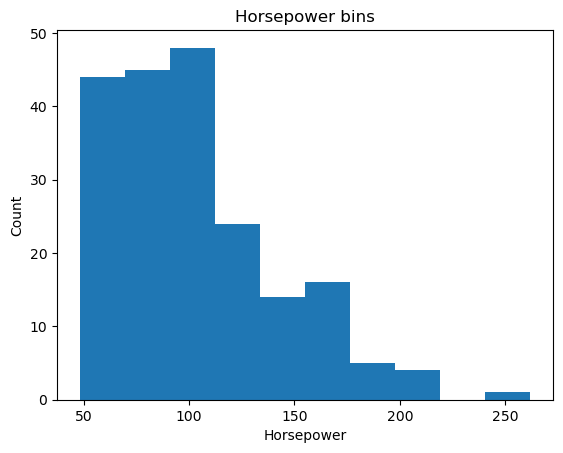

In [142]:
plt.hist(data["horsepower"])
plt.xlabel("Horsepower")
plt.ylabel("Count")
plt.title("Horsepower bins")
plt.show()

- We use the Numpy linspace function, and since we are building 3 equal bins, we need 4 dividers

In [143]:
bins = np.linspace(min(data["horsepower"]), max(data["horsepower"]), 4)
group_names = ["Low","Medium","High"]
data["horsepower_bin"] = pd.cut(data["horsepower"], bins, labels = group_names, include_lowest = True)
data[["horsepower","horsepower_bin"]].head(5)

,horsepower,horsepower_bin
0,111.0,Low
1,111.0,Low
2,154.0,Medium
3,102.0,Low
4,115.0,Low


In [145]:
data["horsepower_bin"].value_counts()

horsepower_bin
Low       153
Medium     43
High        5
Name: count, dtype: int64

Text(0.5, 1.0, 'Horse power bins')

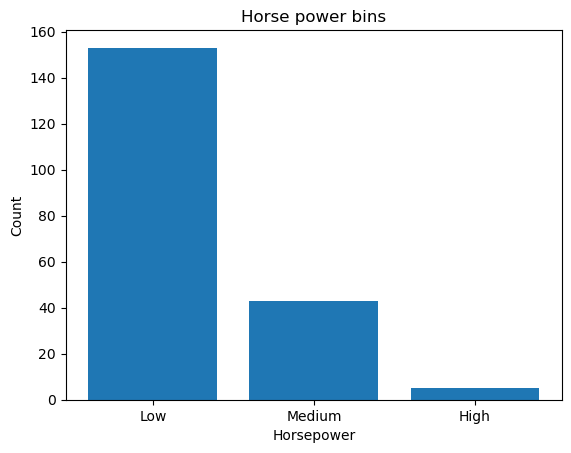

In [149]:
plt.bar(group_names, data["horsepower_bin"].value_counts())
plt.xlabel("Horsepower")
plt.ylabel("Count")
plt.title("Horse power bins")

(array([153.,  43.,   5.]),
 array([ 48.        , 119.33333333, 190.66666667, 262.        ]),
 <BarContainer object of 3 artists>)

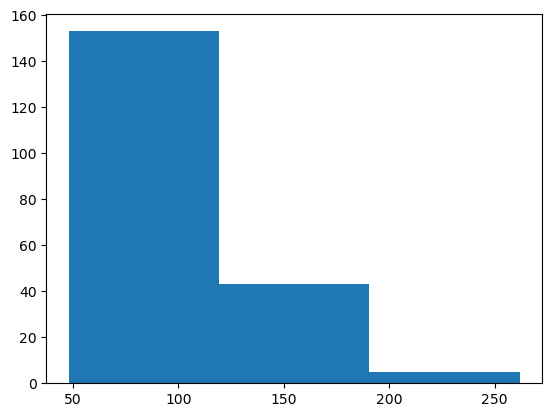

In [151]:
plt.hist(data["horsepower"], bins =3)

#### Indiator variable

Indicator variable (or dummy variable) is a numerical variable used to label categories. They are called "dummies"
because the numbers themselves don't have inherent meaning.

We use indicator variables so that we can use categorical variables for regression analysis.

For example we want to convert the column fuel type to indicator variables, so that we can use the indicator variables
later in the regression models.

In [152]:
data.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-L/100km', 'price', 'city-L/100km', 'horsepower_bin'],
      dtype='object')

In [153]:
dummy_variable_1 = pd.get_dummies(data["fuel-type"])
dummy_variable_1.head()

,diesel,gas
0,False,True
1,False,True
2,False,True
3,False,True
4,False,True


In [154]:
data = pd.concat([data, dummy_variable_1], axis = 1)

In [157]:
data.drop("fuel-type", axis = 1, inplace =True)